In [48]:
import sys
from pathlib import Path
import os
import random
from collections import Counter
import numpy as np
import torch as th
import torch.nn as nn
from torch.utils import data

In [26]:
num_fold = 0

p = Path(os.getcwd())
folder = "res_5_8_2020/fold_0"
res_path = f"{p.parent}/res/{folder}"

LABEL_PATH = f"{p.parent}/data/gestureLabels.npy"
Y = np.load(LABEL_PATH).reshape(2750)

FOLDS_IDX_PATH = f"{p.parent}/data/5_folds.npy"
idx_folds = np.load(FOLDS_IDX_PATH)

# train / test split indices
idx_train = idx_folds[num_fold]
idx_test = list(set(range(len(Y))) - set(idx_train))

Y_test = Y[idx_test]

pred_ch0 = np.load(f"{res_path}/res_1/predictions.npy")
pred_ch1 = np.load(f"{res_path}/res_2/predictions.npy")
pred_ch2 = np.load(f"{res_path}/res_3/predictions.npy")
pred_ch3 = np.load(f"{res_path}/res_4/predictions.npy")

In [106]:
i = 20
print(pred_ch0[:i])
print(pred_ch1[:i])
print(pred_ch2[:i])
print(pred_ch3[:i])
print("-"*30)
print(Y_test[:i])
print(vote[:i])

correct0 = (vote == Y_test).sum()
print(correct0/len(Y_test))

[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 0. 2. 2.]
[2. 0. 0. 2. 0. 2. 0. 0. 2. 0. 0. 2. 0. 2. 0. 2. 0. 0. 2. 0.]
[4. 2. 2. 2. 0. 2. 2. 2. 0. 0. 0. 0. 0. 5. 3. 4. 4. 2. 0. 0.]
[2. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 0. 0. 3. 2. 0. 2. 2. 2. 2.]
------------------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[2 0 0 2 0 2 0 0 0 0 0 0 0 2 0 2 0 0 2 0]
0.6927272727272727


In [104]:
pred = np.zeros((3,len(Y_test)))

pred[0,:] = pred_ch0
pred[1,:] = pred_ch1
pred[2,:] = pred_ch2
#pred[3,:] = pred_ch3 # this channel gives poor results

vote = np.apply_along_axis(
                lambda x: np.argmax(
                np.bincount(x)),
                axis=0, arr=pred.astype(int))

# confusion matrix 

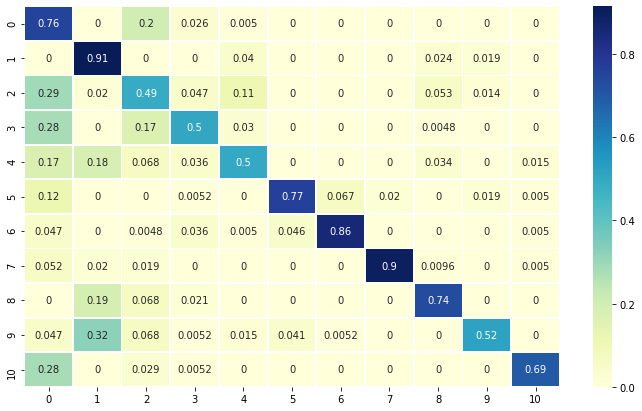

In [107]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

c = confusion_matrix(Y_test, vote)
conf_matr = c/c.sum(1)

fig, ax = plt.subplots(figsize=(12,7)) 
ax = sn.heatmap(conf_matr, annot=True, linewidths = .8, cmap="YlGnBu")
plt.show()